<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/2_3_6_%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC%EC%9D%98_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn

import warnings
warnings.filterwarnings('ignore')

from pandas.core.common import random_state
from scipy.sparse.construct import random

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import graphviz

# 소개

앙상블은 여러 머신러닝 모델을 연결해서 더 강력한 모델 만드는 기법이다.
그중 두개의 아상블 모델이 분류와 회귀 문제의 다양한 데이터셋에서 효과적으로 입증되었다.

\
random forest , gradient boosting

\
둘 다 모델을 구성하는 기본 요소로 결정트리를 이용한다.

## 1. random forest

램덤 포래스트의 아이디어는 각 트리는 비교적 예측을 잘 할 수 있지만, 데이텅의 일부에 과대적합된 트리를 많이 만들면 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다는 것.

\
전략구현

따라서 결정 트리를 많이 만들어야 한다. 가각의 트리는 타깃 예측을 잘하고 다른 트리와 구별되어야 한다. 램덤포레스트에서 트리를 램덤하게 만드는 방법은 두 가지이다. 
- 트리를 만들 때 사용하는 데이터 포인트를 무작위로 선택
- 분할 테스트에서 특성을 무작위로 선택


In [ ]:
# two moon 데이터셋을 가지고 트리 5개로 구성된 램덤 포레스트 모델을 만들어 보자

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3) # 샘플 100개
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2) # 트리 5개
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

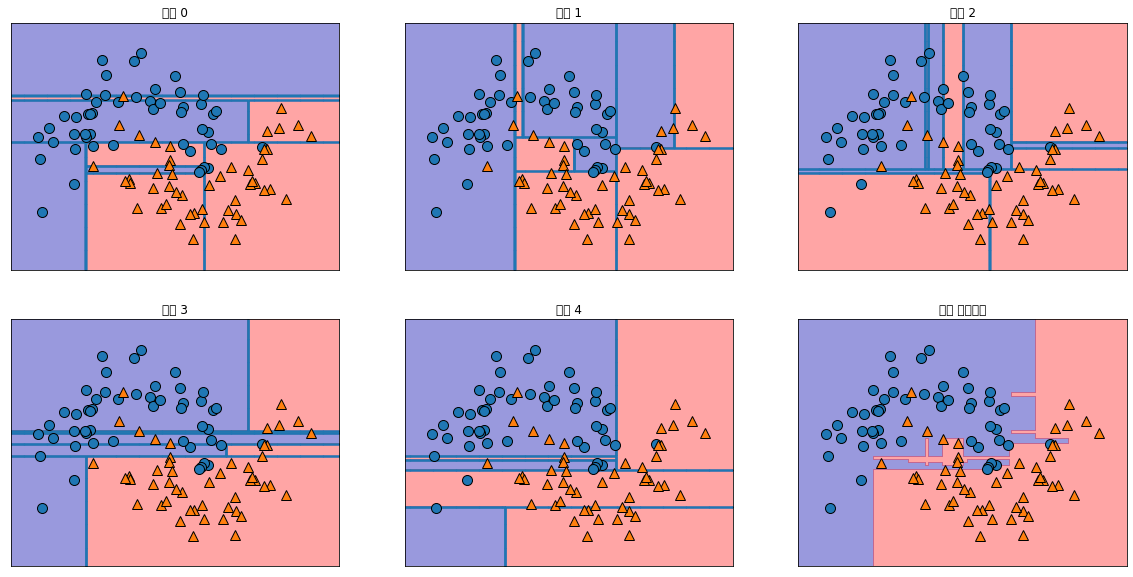

In [ ]:
# 각 트리에 결정 경계 시각화, 취합된 결정경계 시각화

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title('트리 {}'.format(i))
  mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("램덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 각 트리에 따라 결정 경계가 다르다는 걸 알 수 있다.
# 랜덤 포레스트는 개객의 트리보다 덜 과대적합하며, 더 좋은 경계를 보여준다
# 실제 애플리케이션은 더 많은 트리를 쓰므로 더 부드러운 결정결계가 만들어진다.

In [ ]:
# 유방암 데이터셋에 100개의 트리로 이루어진 랜덤 포레스트를 적용해보자
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("훈련 테스트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

# 선형 모델이나 단일 트리 보다 높은 정확도
# 가지치기 필요해보인다

훈련 세트 정확도: 1.000
훈련 테스트 정확도: 0.972


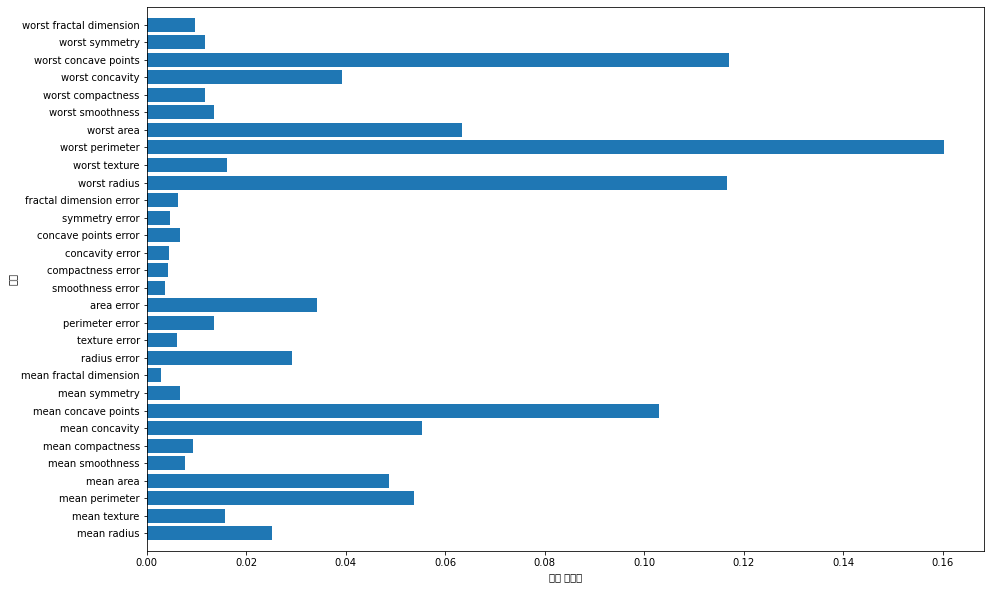

In [15]:
# 랜덤 트리도 특성 중요도를 보여준다. 또한 단일 트리보다 신뢰할 수 있다

def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[-1]
  plt.figure(figsize=(15, 10))
  plt.barh(np.arange(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), cancer.feature_names)
  plt.xlabel("특성 중요도")
  plt.ylabel("특성")
  plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)

단일 트리와 비교하기

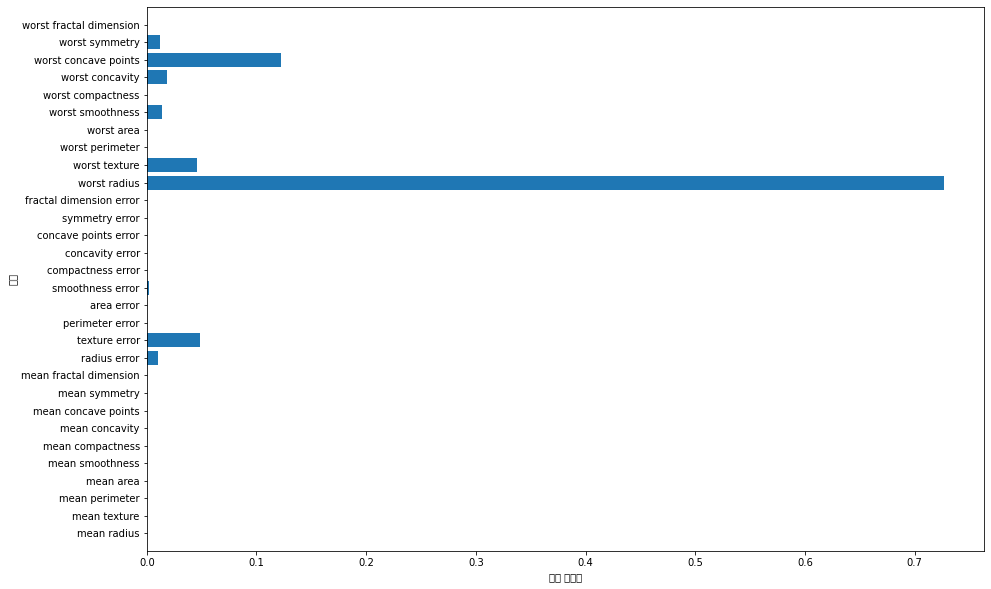

In [17]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
  cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth= 4 ,random_state = 0)
tree.fit(X_train, y_train)

plot_feature_importances_cancer(tree)

## 결론

랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다.
성능이 좋고 매개변수 튜닝을 많이 하지 않아도 잘 작동하고 데이터 스케일을 맞출 필요가 없기 때문이다.
다만 비전문가에게 예측과정을 보여주어야 하거나, 의사 결정 과정을 간소화 해야 한다면 단이 트리를 사용할 수 있다.

\
유념사항
- 다른 random_state를 지정하면 전혀 다른 모델이 만들어진다. 만약 같은 결과를 만들어야 한다면 random_state를 고정하고, 변동을 줄인다면 트리를 많이 만든다.
- 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터는 잘 작동 하지 않기 때문에 선형 모델을 사용한다
- n_estimators 는 클 수록 좋다, 하지만 그 만큼 더 많은 훈련시간과 메모리가 든다. 그래서 가용가능 한 만큼 올려야 한다.
-가지치기를 하면 가끔 성능이 향상되거나, 훈련과 예측에 필요한 메모리와 시간을 줄여 주기도 한다(일반적으로 기본 값을 쓰는 것이 좋다)
